# Transforms for Regression

### Author: Calvin He

Below is an example of heteroscedastic data following a linear trend.  Heteroscedasticity is the quality where the variance of the data changes with the independent variable (or predictor).  The method of linear regression assumes that data is not heteroscedastic.  Therefore, transformations on the data is recommended in order to make the data homoscedastic.

There are a number of suggested transforms including:
- log
- square root
- inverse

There are also methods like Box-Cox, that uses a combination of these and automatically determines a "best" transform.  However, finding the right transform currently seems more like an art than a science.

This is a sandbox for testing transforms.

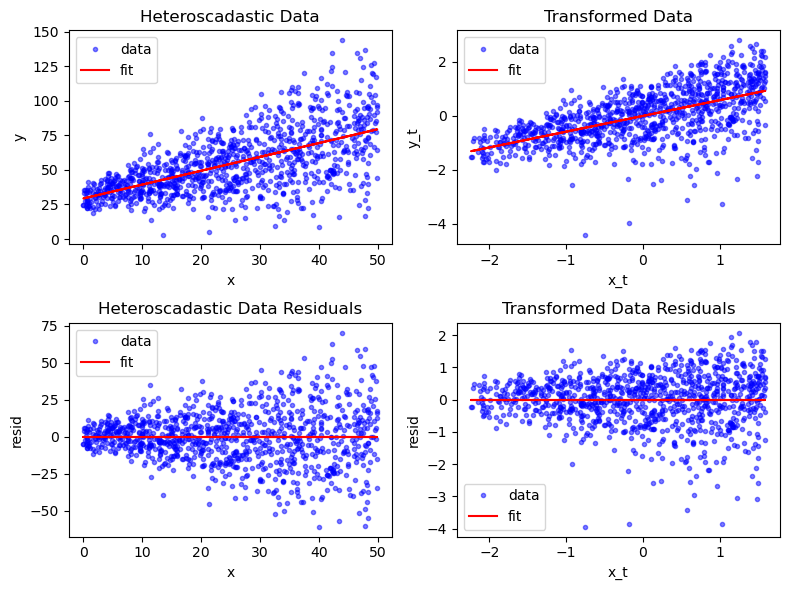

In [127]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import power_transform

import statsmodels.api as sm
import pandas as pd

# Data Generation
np.random.seed(400)
x = np.random.uniform(0,50,1000)
y = np.random.normal(x+30,np.abs(x+10)/2)

# Fitting of Generated Data
X = sm.add_constant(x)
model = LinearRegression().fit(X,y)
y_fit = model.predict(X)
resid = y-y_fit

# TRANSFORMATIONS
xy = pd.DataFrame({'x':x,'y':y})
xy_trans = power_transform(xy,method='box-cox')
x_t = xy_trans[:,0]
y_t = xy_trans[:,1]

# Fitting of Transformed Data
X_t = sm.add_constant(x_t)
model_t = LinearRegression().fit(X_t,y_t)
y_t_fit = model_t.predict(X_t)
resid_t = y_t-y_t_fit

# Plotting
def plot_data(x,y,y_fit,title,xlabel,ylabel):
    plt.plot(x,y,'b.',alpha=0.5,label='data')
    plt.plot(x,y_fit,'r-',label='fit')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plot_data(x,y,y_fit,'Heteroscadastic Data','x','y')
plt.subplot(2,2,2)
plot_data(x_t,y_t,y_t_fit,'Transformed Data','x_t','y_t')
plt.subplot(2,2,3)
plot_data(x,resid,np.zeros(len(x)),'Heteroscadastic Data Residuals','x','resid')
plt.subplot(2,2,4)
plot_data(x_t,resid_t,np.zeros(len(x_t)),'Transformed Data Residuals','x_t','resid')
plt.tight_layout()
plt.show()